# Busca em Grade com `SVC` para intervalo $(0, 0.25]$

A busca utilizou apenas dados dos 6 canais previamente escolhidos.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from seaborn import scatterplot
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, GroupKFold

In [2]:
# lista de str ['01', '02', ..., '24']
file_range = ['{:0>2}'.format(chb) for chb in range(1, 25)]

def dataframe_from_chb(chb_number:str) -> pd.DataFrame:
    df = pd.read_csv(f'./chb{chb_number}/chb{chb_number}_com_dwt.csv')
    df['chb'] = chb_number
    return df

In [3]:
chb_df = pd.concat([dataframe_from_chb(file) for file in file_range], ignore_index=True)

some_6_channels = ['2', '3', '6', '7', '14', '15']

# Filtrando colunas do chb que são referentes aos canais em some_6_channels
columns_from_6_channels = [column for column in chb_df.columns if column.split('-')[-1] in some_6_channels]

chb_groups = chb_df.pop('chb').values
chb_y = chb_df.pop('target').values
chb_X = chb_df[columns_from_6_channels].values

pipe = make_pipeline(StandardScaler(), SVC(cache_size=500))

folds = GroupKFold(n_splits=len(np.unique(chb_groups))).split(chb_X, chb_y, chb_groups)

C_grid = {'svc__C':np.linspace(0, 0.25, 11)[1:]}

In [4]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=C_grid,
    cv=folds
).fit(
    X=chb_X,
    y=chb_y,
    groups=chb_groups
)

pd.DataFrame(gs.cv_results_).to_csv('./csvs/11-gs-pipe-svc-oneVSall_wsc-2.csv', index=False)

In [5]:
columns = ['rank_test_score', 'param_svc__C', 'mean_test_score', 'std_test_score']

cv_results_df = pd.read_csv('./csvs/11-gs-pipe-svc-oneVSall_wsc-2.csv')[columns]

cv_results_df.style.background_gradient(cmap='Blues', subset=['mean_test_score']).hide_index()

rank_test_score,param_svc__C,mean_test_score,std_test_score
7,0.025000,0.792205,0.175630
1,0.050000,0.798510,0.173097
2,0.075000,0.797746,0.173469
3,0.100000,0.795729,0.172670
4,0.125000,0.794276,0.171767
6,0.150000,0.792903,0.173411
5,0.175000,0.792964,0.172379
9,0.200000,0.791260,0.172588
8,0.225000,0.791966,0.171231
10,0.250000,0.790293,0.170272


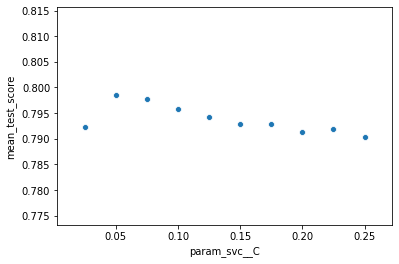

In [6]:
scatterplot(
    data=cv_results_df,
    x='param_svc__C',
    y='mean_test_score'
)

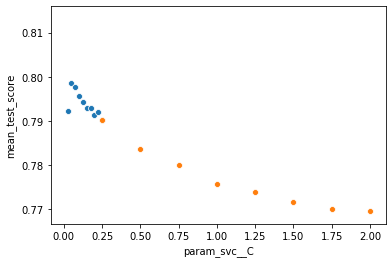

In [7]:
scatterplot(
    data=cv_results_df,
    x='param_svc__C',
    y='mean_test_score'
)

scatterplot(
    data=pd.read_csv('./csvs/09-pipe-gs-svc-oneVSall_with_some_6channels.csv'),
    x='param_svc__C',
    y='mean_test_score'
)